## Exam 2 (Due April 17, 2018 at 11:59 pm)

Please read each question carefully and apply the necessary exploratory analysis to each data set, as well as test for the assumptions relevant to each method when appropriate.

Write the answers in the space provided below each question.

$1$. Small sample sizes affects accuracy of a one tail t-test because it resembles a normal distribution.

a. True

b. False

<b>False </b>

$2$. Data on 102 male and 100 female athletes were collected at the Australian Institute of Sport. The data are  in the file ais.txt.

Develop a logistic regression model for gender ( y = 1 corresponds to female) or ( y = 0 corresponds to male) based on the following predictors (which is a subset of those available):

- RCC, read cell count
- WCC, white cell count
- BMI, body mass index
 
Remember to check for the model assumptions.

In [124]:
ais <- read.csv('ais.txt', sep=' ')
head(ais)

Sex,Ht,Wt,LBM,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,Bfat,Label,Sport,X
1,195.9,78.9,63.32,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,f-b_ball,b_ball,NA
1,189.7,74.4,58.55,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,f-b_ball,b_ball,NA
1,177.8,69.1,55.36,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,f-b_ball,b_ball,NA
1,185.0,74.9,57.18,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,f-b_ball,b_ball,NA
1,184.6,64.6,53.20,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,f-b_ball,b_ball,NA
1,174.0,63.7,53.77,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,f-b_ball,b_ball,NA


In [125]:
##plot(ais$RCC)
##plot(ais$WCC)
##After plotting the data, we see that there are outliers RCC > 6.0, and WCC > 12. BMI looked okay. 

In [126]:
ais$Sex = as.factor(ais$Sex)

In [127]:
ais <- ais[ais$RCC < 6.0,]
ais <- ais[ais$WCC < 12.0,]

In [128]:
model <- glm(Sex ~ RCC + WCC + BMI, family = "binomial", data = ais)
summary(model)


Call:
glm(formula = Sex ~ RCC + WCC + BMI, family = "binomial", data = ais)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6859  -0.5111   0.1199   0.4920   2.5761  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 28.96248    3.93685   7.357 1.88e-13 ***
RCC         -5.44018    0.74705  -7.282 3.28e-13 ***
WCC          0.28744    0.15106   1.903  0.05707 .  
BMI         -0.23429    0.08826  -2.654  0.00794 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 273.09  on 196  degrees of freedom
Residual deviance: 142.82  on 193  degrees of freedom
AIC: 150.82

Number of Fisher Scoring iterations: 5


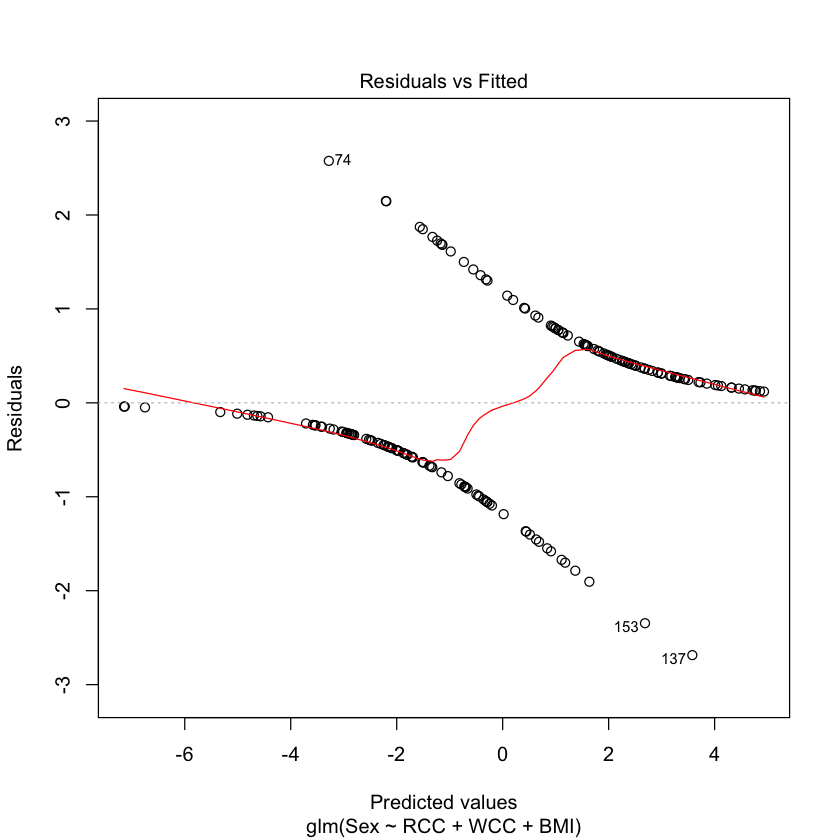

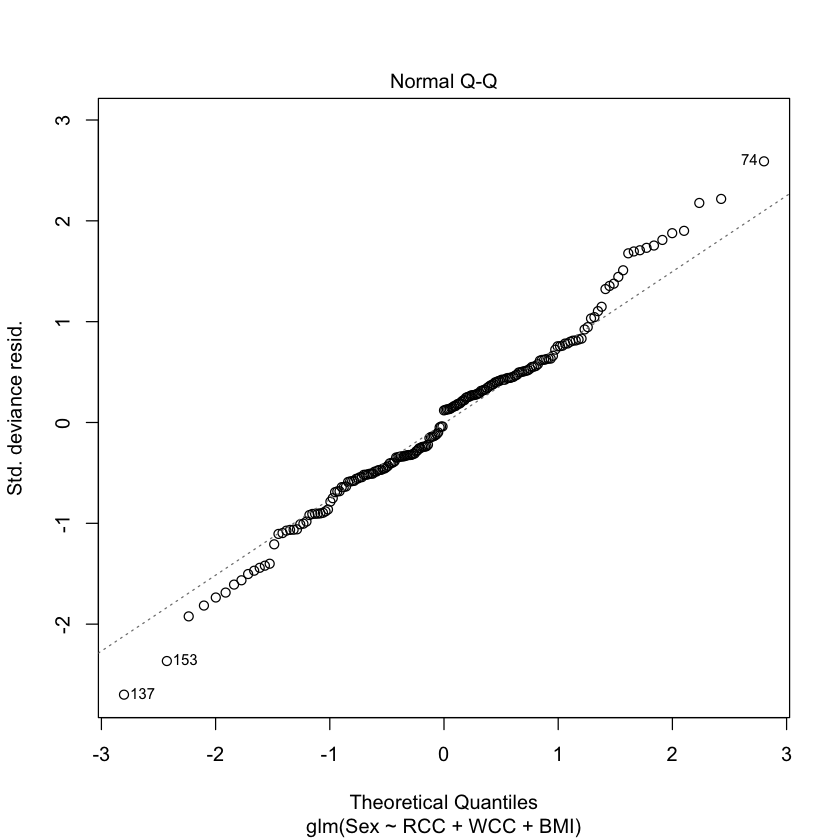

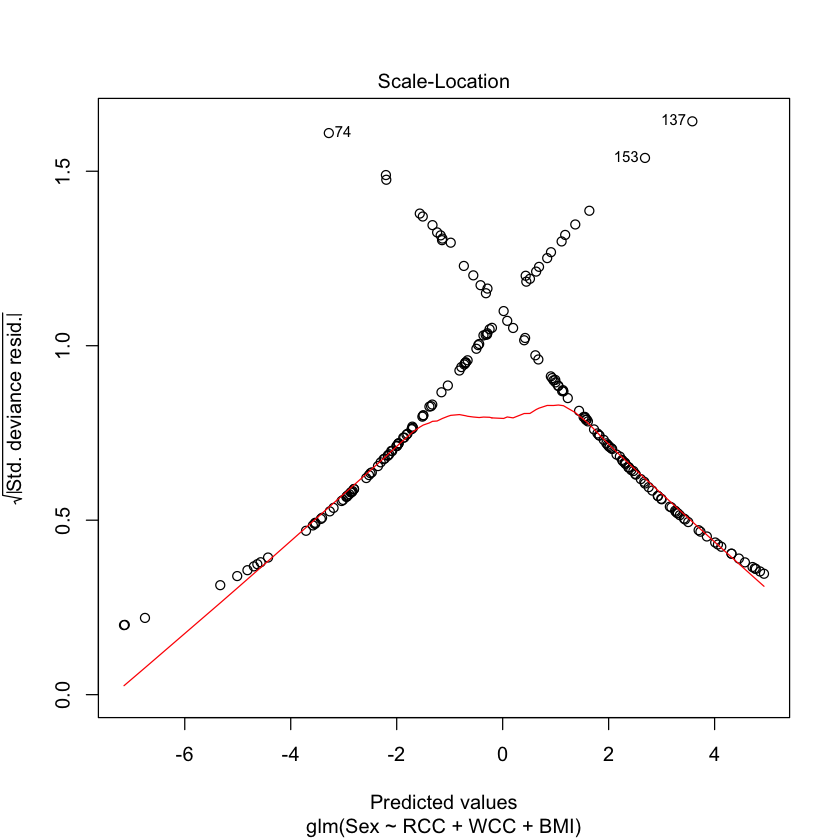

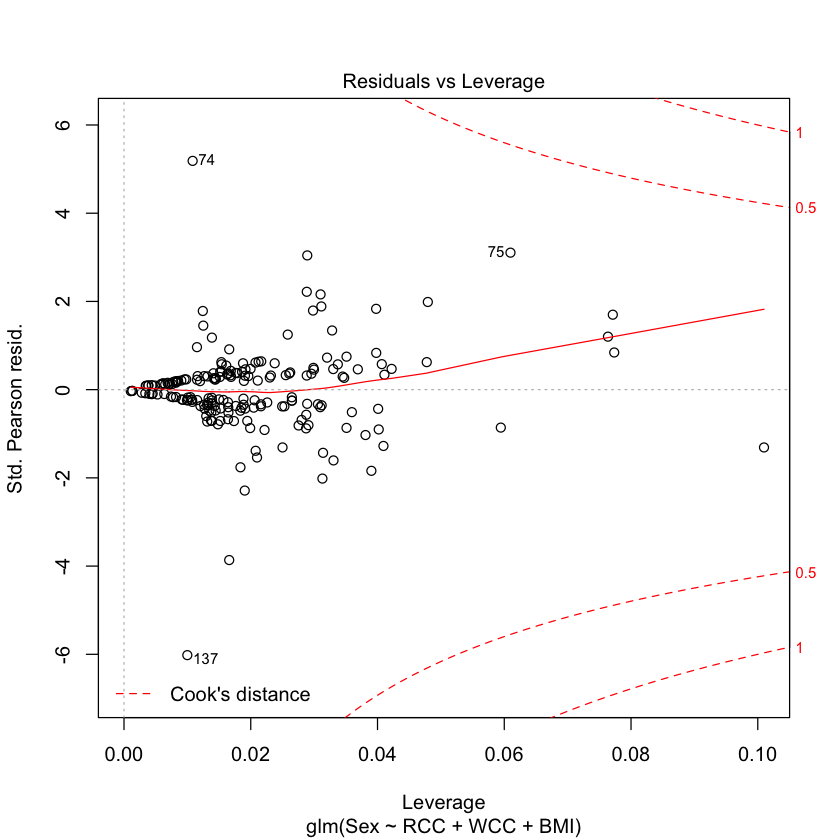

In [129]:
plot(model)

$3$. If scores are normally distributed with a mean of 42 and a standard deviation of 8, what percent of the scores is: 

(a) greater than 25? <b>0.98</b>

(b) smaller than 31? <b>0.085</b>

(c) between 25 and 31? <b>0.0678</B>

In [130]:
mean <- 42
std <- 8

In [131]:
a = pnorm(25, mean, std, lower.tail=FALSE)

In [132]:
b = pnorm(31, mean, std, lower.tail=TRUE)

In [133]:
c = 1 - pnorm(31, mean, std, lower.tail=FALSE) - pnorm(25, mean, std, lower.tail=TRUE)

In [134]:
print(a)
print(b)
print(c)

[1] 0.9832067
[1] 0.08456572
[1] 0.06777242


$4$. From the following table:
![title](table1.png)

a. Apply the appropiate tests to evaluate the null hypothesis that there is no difference in the noise values means at different vehicle sizes. 

b. Examine all assumptions related to the test and make sure that the data follows all of those assumptions.

In [135]:
noise <- c(810, 820, 820, 835, 835, 835,
                 840, 840, 840, 845, 855, 850,
                 785, 790, 785, 760, 760, 770)
size <- c('s', 's', 's', 's', 's', 's',
          'm', 'm', 'm', 'm', 'm', 'm',
           'l', 'l', 'l', 'l', 'l', 'l')

In [136]:
table <- data.frame(size=size, noise=noise)
head(table)

size,noise
s,810
s,820
s,820
s,835
s,835
s,835


In [137]:
res.aov <- aov(noise ~ size, data=table)
summary(res.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
size         2  15703    7851   70.49 2.36e-08 ***
Residuals   15   1671     111                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<b>Solution</b>: The p-value is very low, and considerably less than 0.05, suggesting that the relationship between noise values and vehicle size is significant.

$5$. The Central Limit Theorem states that as we increase our sample size sufficiently, the mean of all samples drawn from the population will be approximately equal to the mean of the population.

<b>a. True</b>

$6$. Consider the following scenario: A data scientist has been asked to conduct a research on the effect of a treatment on anorexia patients. The data corresponded to weight change data for young female anorexia patient. The data contain three columns:


- treat: Factor of three levels: "Cont" (control), "CBT" (Cognitive Behavioural treatment) and "FT" (family treatment).
- Prewt: Weight of patient before study period, in lbs.
- Postwt:Weight of patient after study period, in lbs.

A. Is there a difference between the mean female patiente weights before and after the study across all treatments?

In [138]:
library(MASS)
attach(anorexia)
head(anorexia)

The following objects are masked from anorexia (pos = 3):

    Postwt, Prewt, Treat



Treat,Prewt,Postwt
Cont,80.7,80.2
Cont,89.4,80.1
Cont,91.8,86.4
Cont,74.0,86.3
Cont,78.1,76.1
Cont,88.3,78.1


In [139]:
t.test(anorexia[anorexia$Treat == 'Cont',]$Prewt, anorexia[anorexia$Treat == 'Cont',]$Postwt)


	Welch Two Sample t-test

data:  anorexia[anorexia$Treat == "Cont", ]$Prewt and anorexia[anorexia$Treat == "Cont", ]$Postwt
t = 0.30918, df = 48.385, p-value = 0.7585
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.475824  3.375824
sample estimates:
mean of x mean of y 
 81.55769  81.10769 


<b>From this t-test, we see that the p-value is high and thus not statisticall significant.</b>

In [140]:
t.test(anorexia[anorexia$Treat == 'CBT',]$Prewt, anorexia[anorexia$Treat == 'CBT',]$Postwt)


	Welch Two Sample t-test

data:  anorexia[anorexia$Treat == "CBT", ]$Prewt and anorexia[anorexia$Treat == "CBT", ]$Postwt
t = -1.677, df = 44.931, p-value = 0.1005
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.6183919  0.6045988
sample estimates:
mean of x mean of y 
 82.68966  85.69655 


<b>From this t-test, we see that the p-value is still high, but not nearly as high as in the first t-test. It is still insignificant, though. </b>

In [141]:
t.test(anorexia[anorexia$Treat == 'FT',]$Prewt, anorexia[anorexia$Treat == 'FT',]$Postwt)


	Welch Two Sample t-test

data:  anorexia[anorexia$Treat == "FT", ]$Prewt and anorexia[anorexia$Treat == "FT", ]$Postwt
t = -3.0414, df = 25.986, p-value = 0.005324
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.17472  -2.35469
sample estimates:
mean of x mean of y 
 83.22941  90.49412 


<b>From this t-test, we see that the p-value is low and thus statistically significant. </b>

$7$. In Hypothesis testing, the critical region is the probability that the test statistic equals the observed value or a more extreme value under the assumption that the null hypthothesis is true.

<b> a. True</b>


$8$. The following data reports the calorie content of beef hot dogs. Here are the numbers of calories of a random sample of 20 different hot dogs:

186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132.

Assume that these numbers are the observed values from a random sample of twenty independent normal random variables with mean μ and variance σ2, both unknown. Find the 90% confidence intervals for the mean number of calories μ.

In [142]:
cals <- c(186, 181, 176, 149, 184, 190, 158, 139, 175, 148, 152, 111, 141, 153, 190, 157, 131, 149, 135, 132)

In [143]:
avg = mean(cals)
std = sd(cals)
len = length(cals)
alpha = 0.10
n = 20

In [144]:
avg

[1] 156.85

In [145]:
avg - qt(alpha/2, n-1)*(std/sqrt(n))

[1] 165.6044

In [146]:
avg + qt(alpha/2, n-1)*(std/sqrt(n))

[1] 148.0956

$9$. Which type of predictor variables can be included in a General Linear Model

<b>e. Mixed </b>

$10$. The dataset anscombe.txt represent 4 different datasets constructed by Anscombe in 1973. The x and y variables are matched to each dataset respectively (e.g. x1 corresponds to y1, etc). Produce a Simple linear regression for each dataset (write the linear equation for each model), generate residuals plots, and discuss which is the most appropiate model from the 4 datasets and why.

In [147]:
ansc = read.table(file = "anscombe.txt", stringsAsFactors = F, header = T)
head(ansc)

case,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04


In [148]:
mod1 = lm(ansc$y1 ~ ansc$x1)
summary(mod1)


Call:
lm(formula = ansc$y1 ~ ansc$x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
ansc$x1       0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


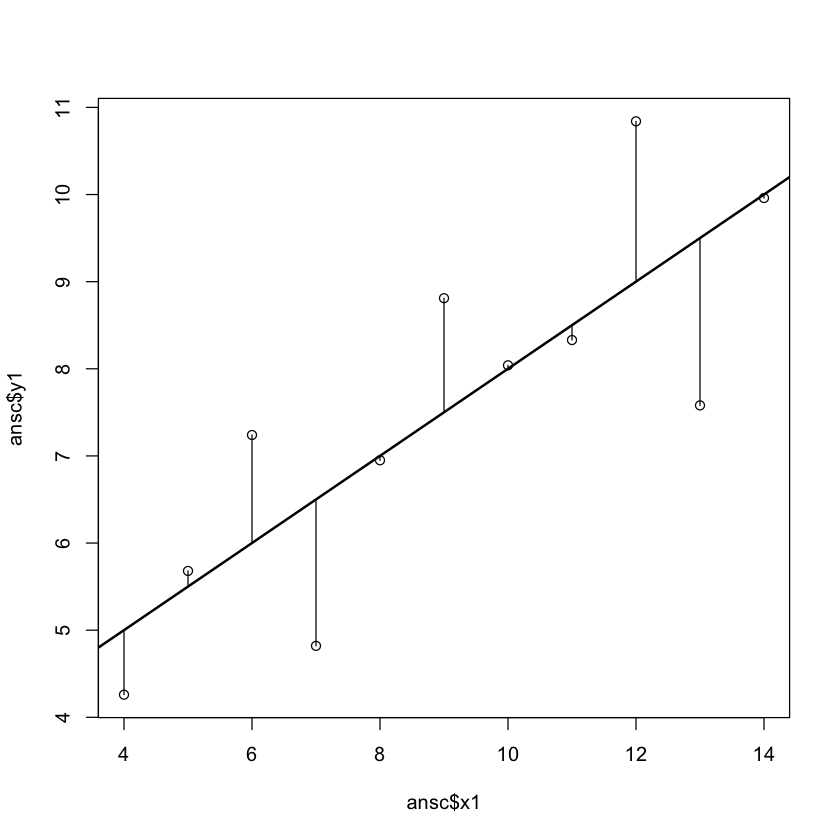

In [149]:
plot(ansc$x1, ansc$y1)
abline(mod1, lwd=2)
pre <- predict(mod1)
segments(ansc$x1, ansc$y1, ansc$x1, pre)

<b>Linear equation: y = 3.0001x + 0.5001</b>

In [150]:
mod2 = lm(ansc$y2 ~ ansc$x2)
summary(mod2)


Call:
lm(formula = ansc$y2 ~ ansc$x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
ansc$x2        0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179


<b>Linear equation: y = 3.001x + 0.500</b>

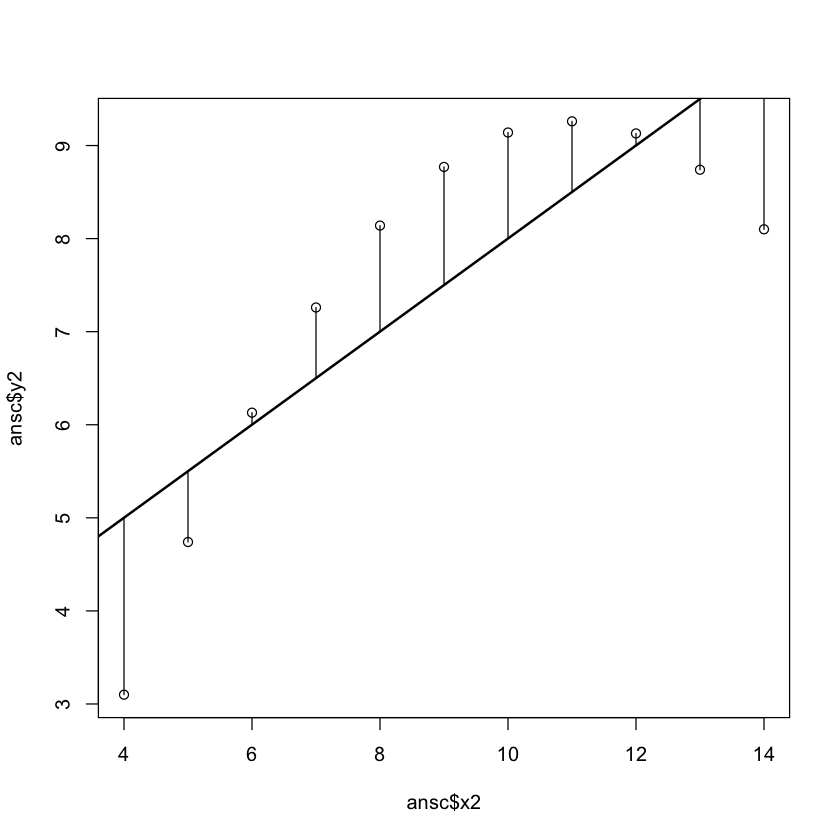

In [151]:
plot(ansc$x2, ansc$y2)
abline(mod2, lwd=2)
pre <- predict(mod2)
segments(ansc$x2, ansc$y2, ansc$x2, pre)

In [152]:
mod3 = lm(ansc$y3 ~ ansc$x3)
summary(mod3)


Call:
lm(formula = ansc$y3 ~ ansc$x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1586 -0.6146 -0.2303  0.1540  3.2411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0025     1.1245   2.670  0.02562 * 
ansc$x3       0.4997     0.1179   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6663,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002176


<b>Linear equation: y = 3.0025x + 0.4997</b>

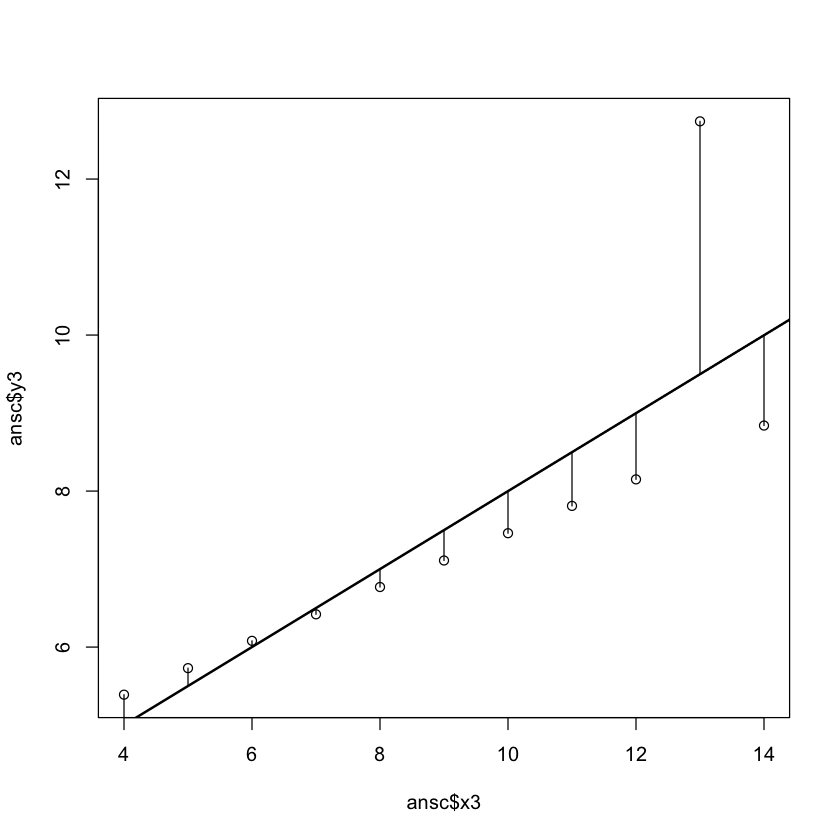

In [153]:
plot(ansc$x3, ansc$y3)
abline(mod3, lwd=2)
pre <- predict(mod3)
segments(ansc$x3, ansc$y3, ansc$x3, pre)

In [154]:
mod4 = lm(ansc$y4 ~ ansc$x4)
summary(mod4)


Call:
lm(formula = ansc$y4 ~ ansc$x4)

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -0.831  0.000  0.809  1.839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0017     1.1239   2.671  0.02559 * 
ansc$x4       0.4999     0.1178   4.243  0.00216 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6297 
F-statistic:    18 on 1 and 9 DF,  p-value: 0.002165


<b>Linear equation: y = 3.0017x + 0.4999</b>

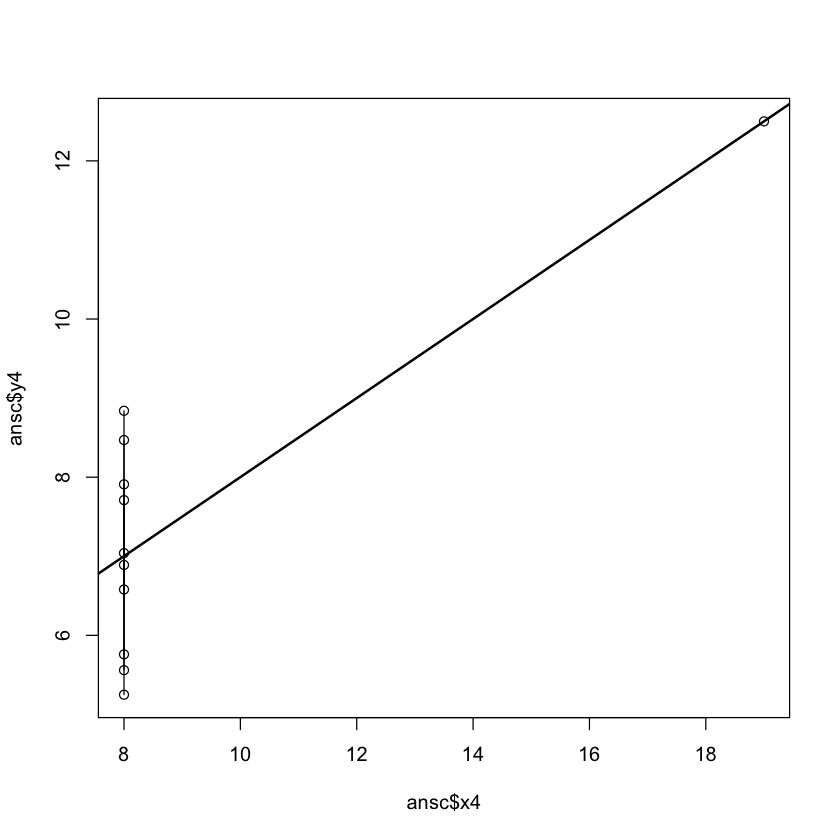

In [155]:
plot(ansc$x4, ansc$y4)
abline(mod4, lwd=2)
pre <- predict(mod4)
segments(ansc$x4, ansc$y4, ansc$x4, pre)

<b>It would appears that the last appropriate model as it has the lowest p value and the highest r squared, but there is no correlation in these models, as per the graph. So, the first model would be the best fit.</b>